In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nationalholidaysindia/2021.csv
/kaggle/input/nationalholidaysindia/2019.csv
/kaggle/input/nationalholidaysindia/2020.csv
/kaggle/input/nationalholidaysindia/2023.csv
/kaggle/input/nationalholidaysindia/2018.csv
/kaggle/input/nationalholidaysindia/2022.csv
/kaggle/input/delhi-weather-data/testset.csv
/kaggle/input/delhi-5-minute-electricity-demand-for-forecasting/powerdemand_5min_2021_to_2024_with weather.csv


In [59]:
holidays = pd.read_csv('/kaggle/input/nationalholidaysindia/2021.csv')
weather = pd.read_csv('/kaggle/input/delhi-weather-data/testset.csv')
electricity = pd.read_csv('/kaggle/input/delhi-5-minute-electricity-demand-for-forecasting/powerdemand_5min_2021_to_2024_with weather.csv')

In [60]:
holidays.head()

,date,day,holiday,holiday_type
0,2021-01-01,Friday,New Year's Day (R),Restricted
1,2021-01-13,Wednesday,Lohri (R),Restricted
2,2021-01-14,Thursday,Makar Sankranti/Pongal (R),Restricted
3,2021-01-20,Wednesday,Guru Gobind Singh's Birthday (R),Restricted
4,2021-01-26,Tuesday,Republic Day (G),Gazetted


In [61]:
weather.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [62]:
electricity.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [63]:
print(holidays.info())
print(weather.info())
print(electricity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          49 non-null     object
 1   day           49 non-null     object
 2   holiday       49 non-null     object
 3   holiday_type  49 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    

In [64]:
print("holidays = " , holidays.shape)
print("weather = " , weather.shape)
print("electricity = " , electricity.shape)

holidays =  (49, 4)
weather =  (100990, 20)
electricity =  (393440, 15)


# Holidays

In [65]:
holidays.head()

,date,day,holiday,holiday_type
0,2021-01-01,Friday,New Year's Day (R),Restricted
1,2021-01-13,Wednesday,Lohri (R),Restricted
2,2021-01-14,Thursday,Makar Sankranti/Pongal (R),Restricted
3,2021-01-20,Wednesday,Guru Gobind Singh's Birthday (R),Restricted
4,2021-01-26,Tuesday,Republic Day (G),Gazetted


In [66]:
holidays['date'] = pd.to_datetime(holidays['date'], errors='coerce')

extracting the dd and mm part of yy-mm-dd

In [67]:
holidays['day'] = holidays['date'].dt.day
holidays['month'] = holidays['date'].dt.month

In [68]:
holidays.head()

,date,day,holiday,holiday_type,month
0,2021-01-01,1,New Year's Day (R),Restricted,1
1,2021-01-13,13,Lohri (R),Restricted,1
2,2021-01-14,14,Makar Sankranti/Pongal (R),Restricted,1
3,2021-01-20,20,Guru Gobind Singh's Birthday (R),Restricted,1
4,2021-01-26,26,Republic Day (G),Gazetted,1


Dropping holidays['date'] , not needed.

In [69]:
holidays.drop(columns='date',inplace=True)

In [70]:
holidays.head()

,day,holiday,holiday_type,month
0,1,New Year's Day (R),Restricted,1
1,13,Lohri (R),Restricted,1
2,14,Makar Sankranti/Pongal (R),Restricted,1
3,20,Guru Gobind Singh's Birthday (R),Restricted,1
4,26,Republic Day (G),Gazetted,1


In [71]:
holidays.isna().sum()

day             0
holiday         0
holiday_type    0
month           0
dtype: int64

In [72]:
holidays.nunique()

day             26
holiday         49
holiday_type     2
month           11
dtype: int64

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
sns.set()

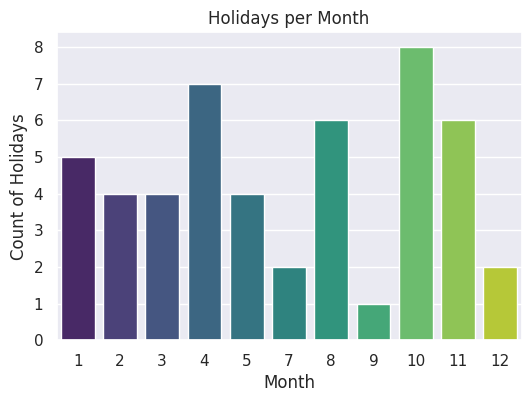

In [75]:
# 1. Bar Plot – Holidays per Month
plt.figure(figsize=(6,4))
sns.countplot(x="month", data=holidays, palette="viridis")
plt.title("Holidays per Month")
plt.xlabel("Month")
plt.ylabel("Count of Holidays")
plt.show()


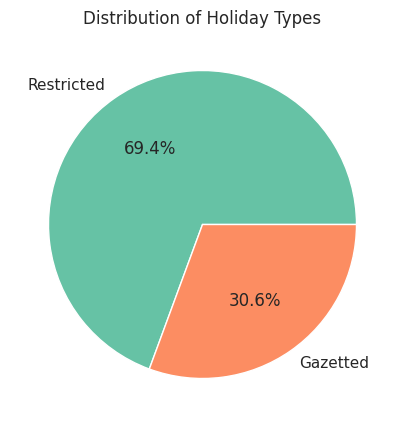

In [76]:
# 2. Pie Chart – Distribution of Holiday Types
plt.figure(figsize=(5,5))
holidays["holiday_type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#66c2a5","#fc8d62"])
plt.title("Distribution of Holiday Types")
plt.ylabel("")
plt.show()

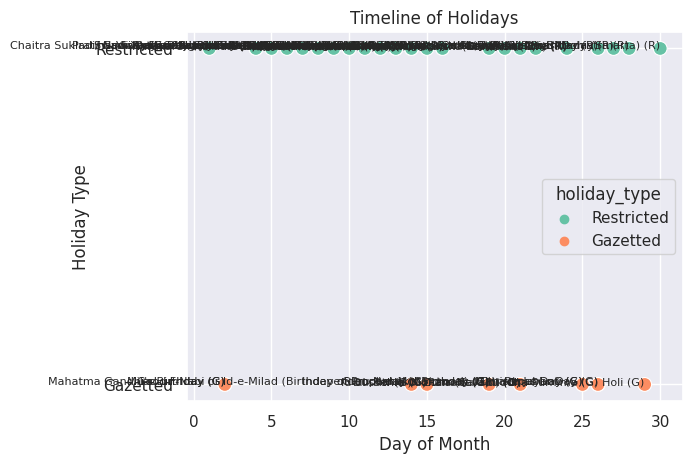

In [77]:
# Timeline Plot – Holidays in a Month
sns.scatterplot(x="day", y="holiday_type", data=holidays, hue="holiday_type", s=100, palette="Set2")
for i, row in holidays.iterrows():
    plt.text(row.day, row.holiday_type, row.holiday, fontsize=8, ha="right")
plt.title("Timeline of Holidays")
plt.xlabel("Day of Month")
plt.ylabel("Holiday Type")
plt.show()


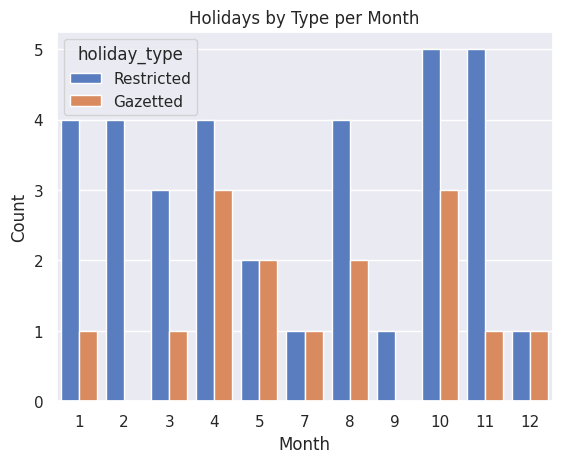

In [78]:
# Grouped Bar Plot – Holiday Type per Month
sns.countplot(x="month", hue="holiday_type", data=holidays, palette="muted")
plt.title("Holidays by Type per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

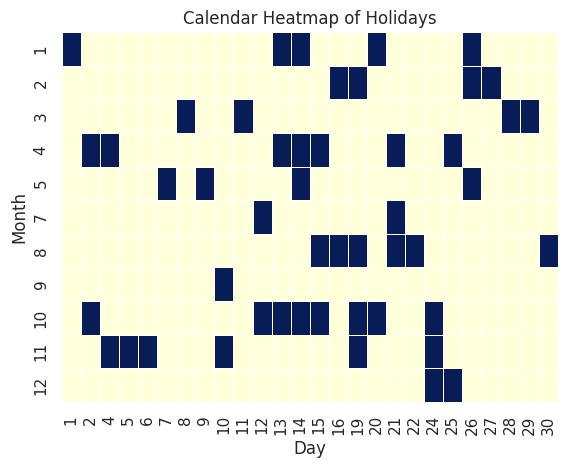

In [79]:
# Heatmap – Calendar Style

pivot = holidays.pivot_table(index="month", columns="day", values="holiday_type", aggfunc="count").fillna(0)
sns.heatmap(pivot, cmap="YlGnBu", linewidths=.5, cbar=False)
plt.title("Calendar Heatmap of Holidays")
plt.xlabel("Day")
plt.ylabel("Month")
plt.show()

# Weather

In [80]:
weather.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [81]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [82]:
weather.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [83]:
weather.nunique()

datetime_utc    100990
 _conds             39
 _dewptm            51
 _fog                2
 _hail               2
 _heatindexm       193
 _hum              100
 _precipm            0
 _pressurem        139
 _rain               2
 _snow               2
 _tempm             50
 _thunder            2
 _tornado            2
 _vism              48
 _wdird             63
 _wdire             17
 _wgustm            22
 _windchillm        20
 _wspdm             90
dtype: int64

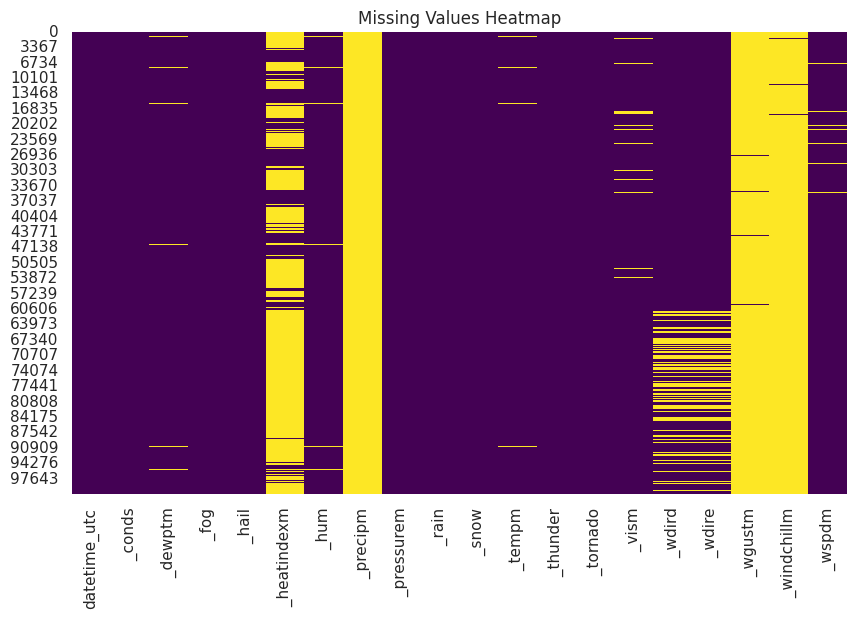

In [84]:
# Missing Values Overview
plt.figure(figsize=(10,6))
sns.heatmap(weather.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


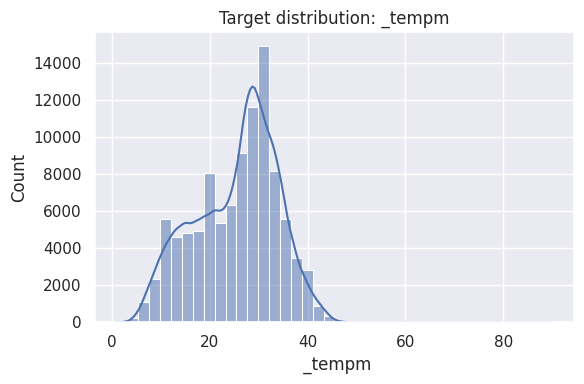

In [85]:
plt.figure(figsize=(6,4))
sns.histplot(weather[' _tempm'].dropna(), bins=40, kde=True)
plt.title('Target distribution: ' + ' _tempm'.strip())
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


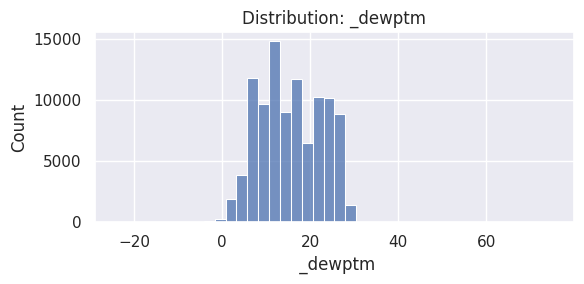

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


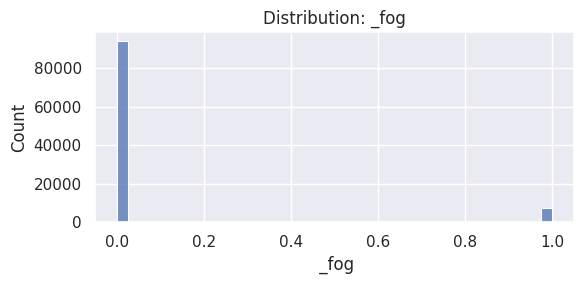

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


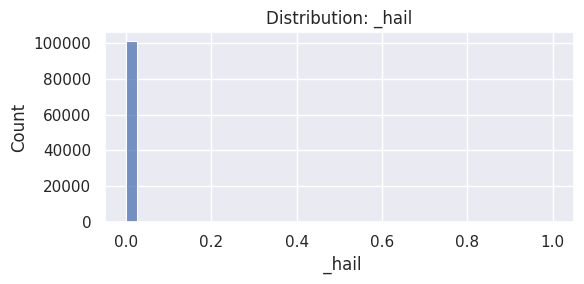

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


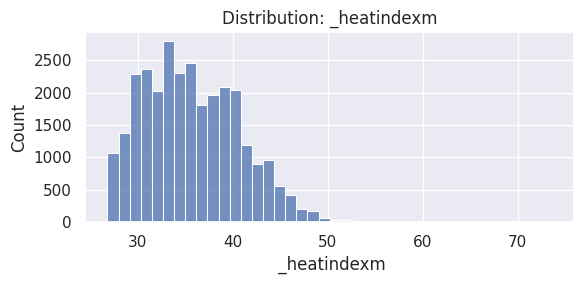

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


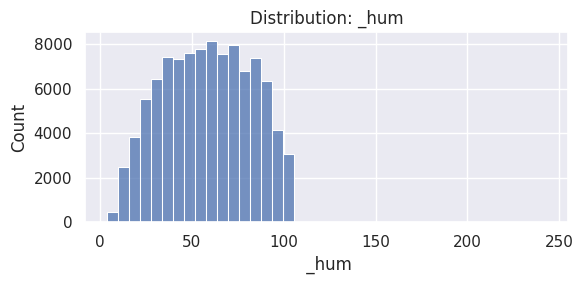

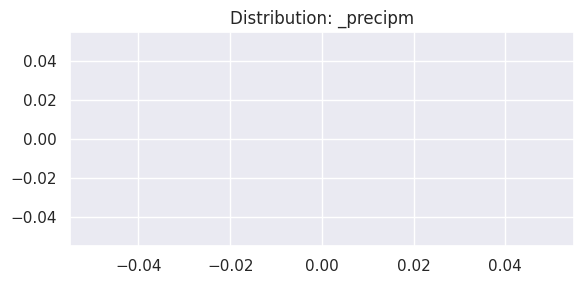

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


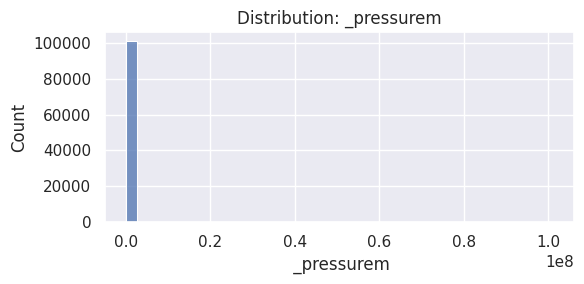

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


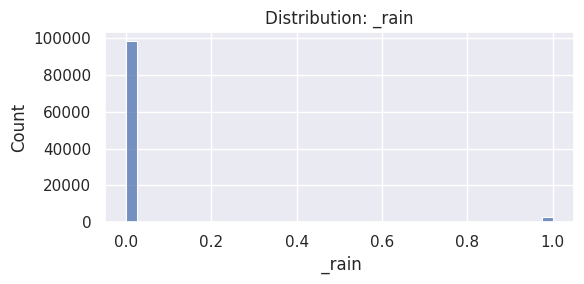

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


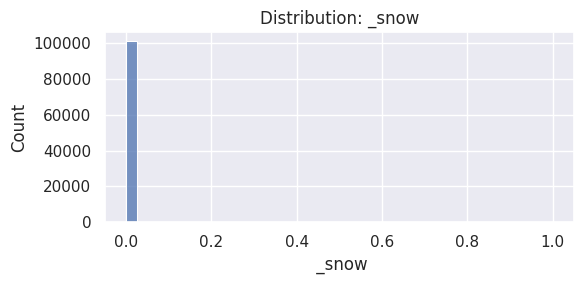

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


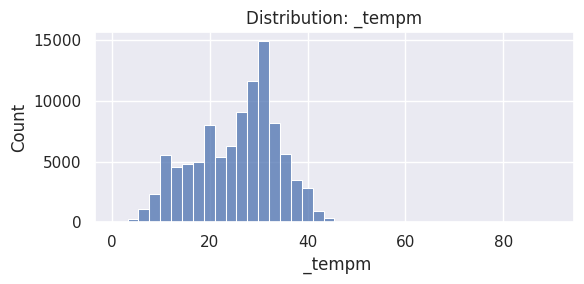

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


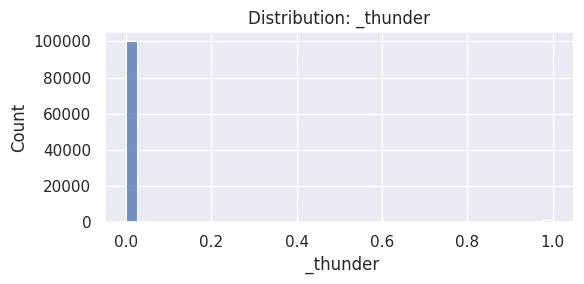

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


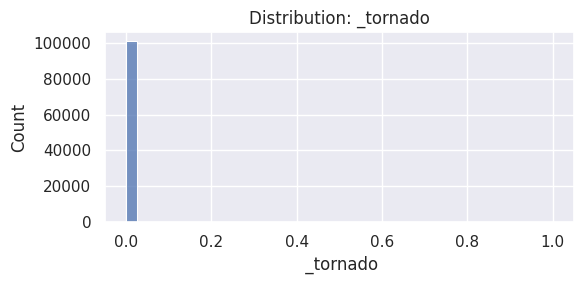

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


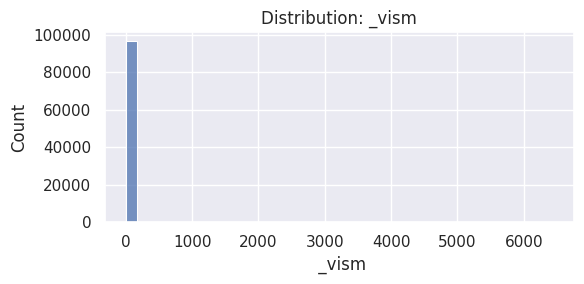

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


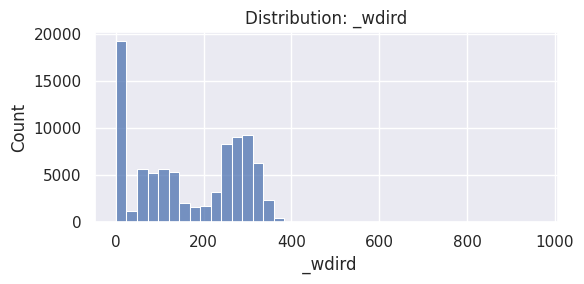

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


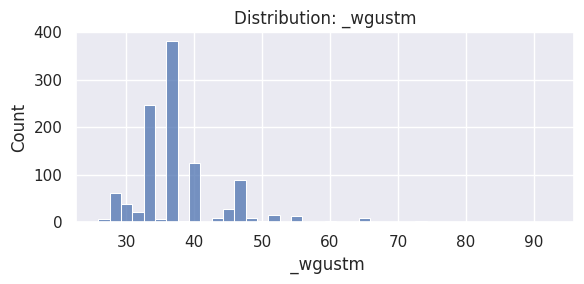

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


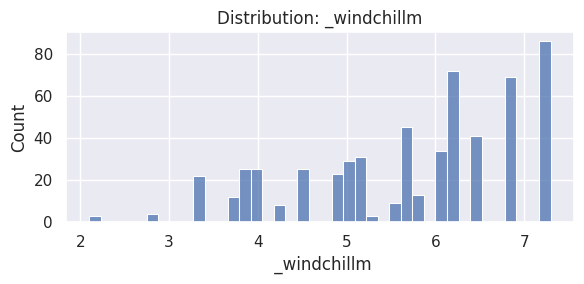

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


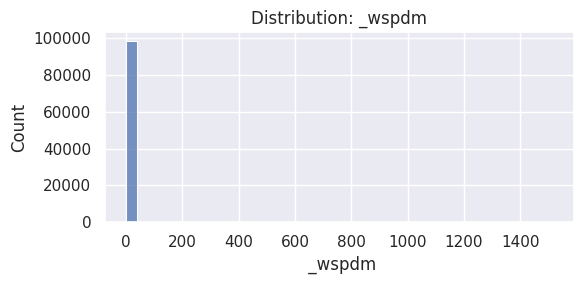

In [86]:
# 2) Numeric distributions (sample top 6 by non-null count)
num_cols = weather.select_dtypes(include=[np.number]).columns.tolist()
non_null_counts = weather[num_cols].notna().sum().sort_values(ascending=False)
for c in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(weather[c].dropna(), bins=40, kde=False)
    plt.title('Distribution: ' + c.strip())
    plt.tight_layout()
    plt.show()


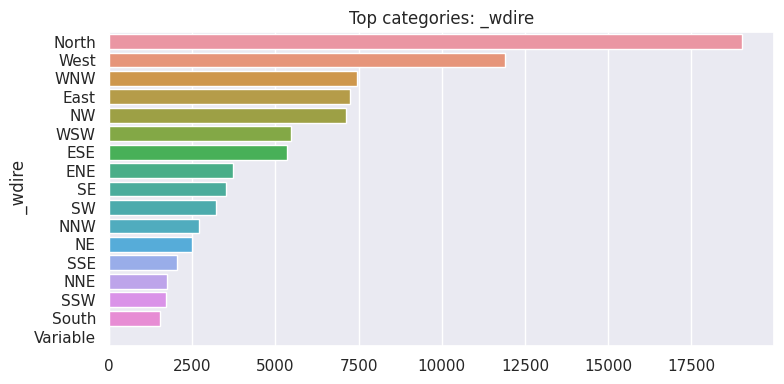

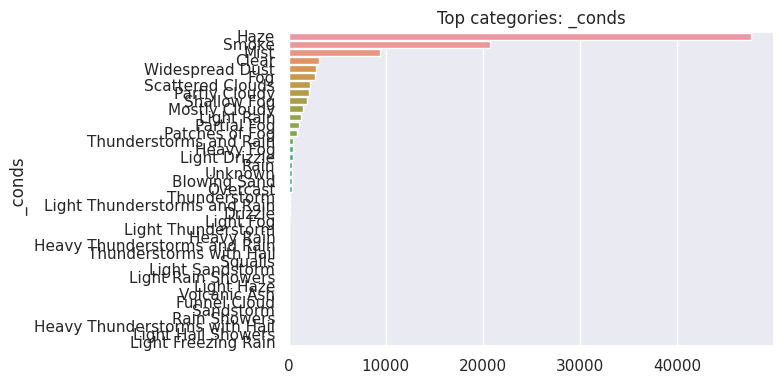

In [87]:
# 3) Categorical counts for wind direction text and conditions
cat_cols = []
if ' _wdire' in weather.columns:
    cat_cols.append(' _wdire')
if ' _conds' in weather.columns:
    cat_cols.append(' _conds')
for c in cat_cols:
    vc = weather[c].dropna().astype(str).value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=vc.values, y=vc.index, orient='h')
    plt.title('Top categories: ' + c.strip())
    plt.tight_layout()
    plt.show()


In [88]:
# Replace invalid values (-9999) with NaN
weather.replace(-9999.0, pd.NA, inplace=True)

# Convert datetime column
weather["datetime_utc"] = pd.to_datetime(weather["datetime_utc"], format="%Y%m%d-%H:%M")

# Extract useful time features
weather["year"] = weather["datetime_utc"].dt.year
weather["month"] = weather["datetime_utc"].dt.month
weather["hour"] = weather["datetime_utc"].dt.hour
weather["dayofweek"] = weather["datetime_utc"].dt.day_name()


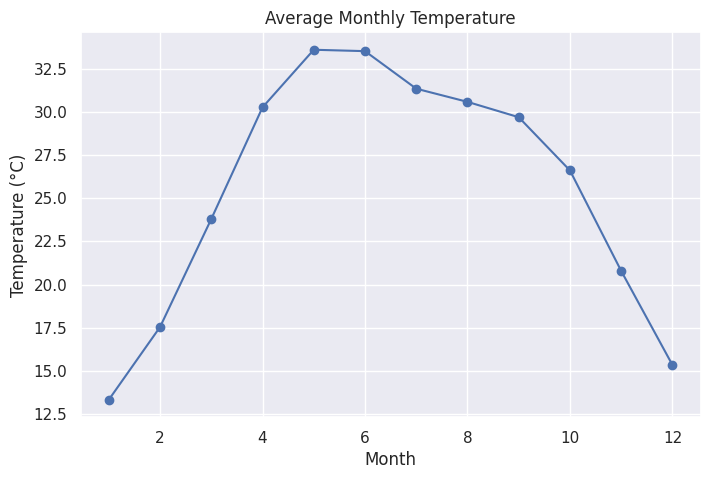

In [89]:
# Average monthly temperature
weather.groupby("month")[" _tempm"].mean().plot(kind="line", marker="o", figsize=(8,5))
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()

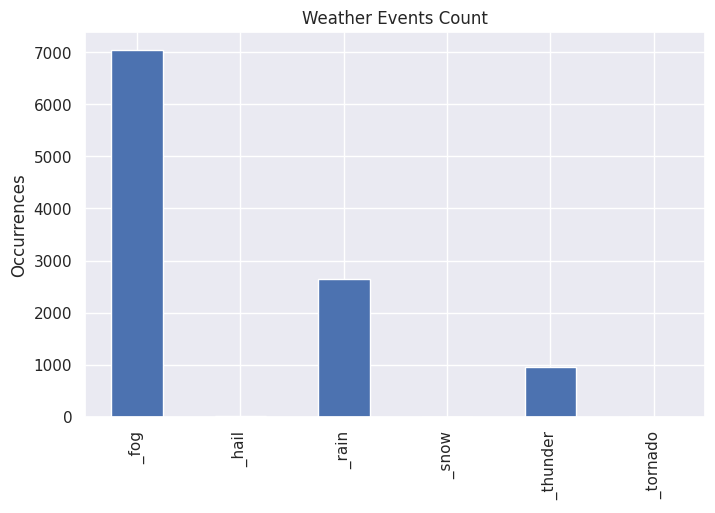

In [90]:
# Binary weather events
event_cols = [" _fog"," _hail"," _rain"," _snow"," _thunder"," _tornado"]
weather[event_cols].sum().plot(kind="bar", figsize=(8,5))
plt.title("Weather Events Count")
plt.ylabel("Occurrences")
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


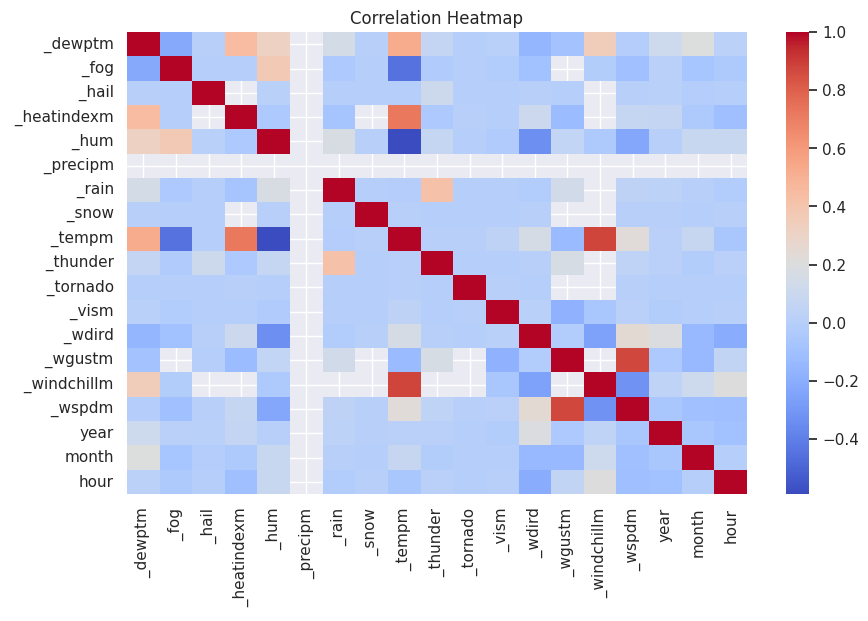

In [91]:
# -----------------
# Correlation Heatmap
# -----------------
plt.figure(figsize=(10,6))
sns.heatmap(weather.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Electricity 

In [96]:
# Standardize column names: lowercase, replace spaces and special chars with underscores
new_cols = []
for c in electricity.columns:
    c2 = str(c).strip().lower().replace(' ', '_').replace('-', '_')
    new_cols.append(c2)

electricity.columns = new_cols

# Drop unnamed index-like column if present
if 'unnamed:_0' in electricity.columns:
    electricity = electricity.drop(columns=['unnamed:_0'])

# Rename specific known columns to concise names
rename_map = {
    'datetime': 'timestamp',
    'power_demand': 'demand_mw',
    'temp': 'temp_c',
    'dwpt': 'dewpoint_c',
    'rhum': 'rel_humidity_pct',
    'wdir': 'wind_dir_deg',
    'wspd': 'wind_speed_ms',
    'pres': 'pressure_hpa',
    'moving_avg_3': 'demand_ma3'
}

for k in list(rename_map.keys()):
    if k in electricity.columns:
        pass

electricity = electricity.rename(columns=rename_map)

# Parse timestamp and sort
if 'timestamp' in electricity.columns:
    electricity['timestamp'] = pd.to_datetime(electricity['timestamp'])
    electricity = electricity.sort_values('timestamp')

# Basic time features if not already present
for part, fmt in [('year', '%Y'), ('month', '%m'), ('day', '%d'), ('hour', '%H'), ('minute', '%M')]:
    if part not in electricity.columns and 'timestamp' in electricity.columns:
        electricity[part] = electricity['timestamp'].dt.__getattribute__(part)


print(electricity.shape)

(393440, 14)


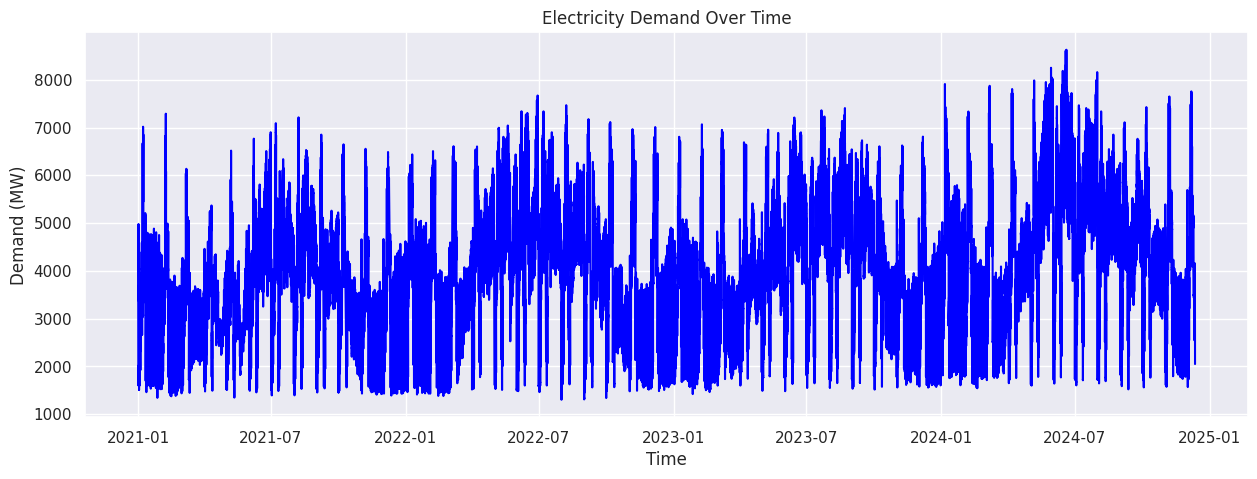

In [100]:
plt.figure(figsize=(15,5))
plt.plot(electricity['timestamp'], electricity['demand_mw'], color='blue')
plt.title('Electricity Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.show()

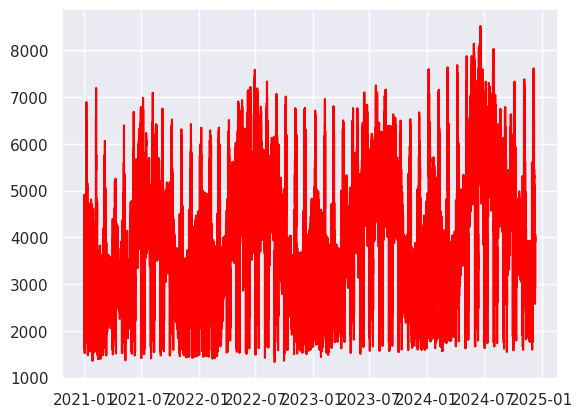

In [101]:
electricity['demand_roll'] = electricity['demand_mw'].rolling(window=24).mean()
plt.plot(electricity['timestamp'], electricity['demand_roll'], color='red')


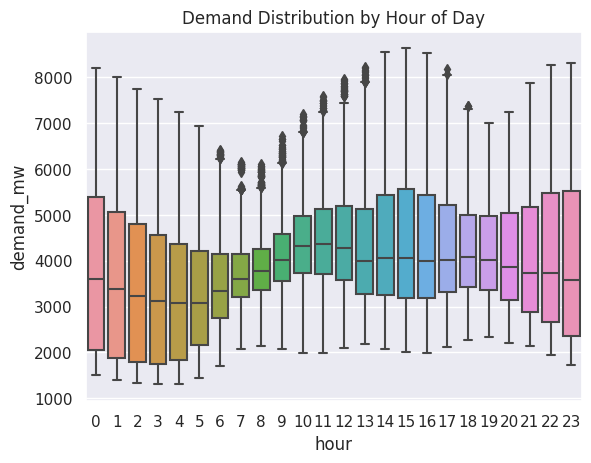

In [102]:
sns.boxplot(x='hour', y='demand_mw', data=electricity)
plt.title('Demand Distribution by Hour of Day')
plt.show()


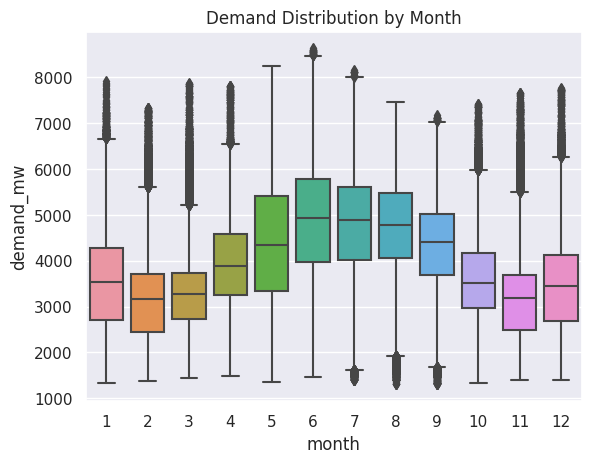

In [103]:
sns.boxplot(x='month', y='demand_mw', data=electricity)
plt.title('Demand Distribution by Month')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


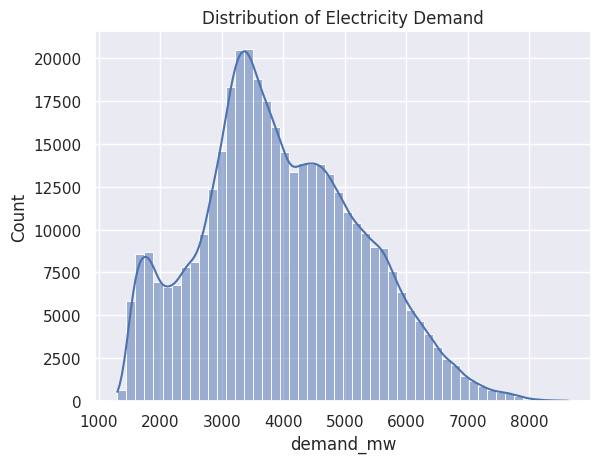

In [104]:
sns.histplot(electricity['demand_mw'], bins=50, kde=True)
plt.title('Distribution of Electricity Demand')
plt.show()


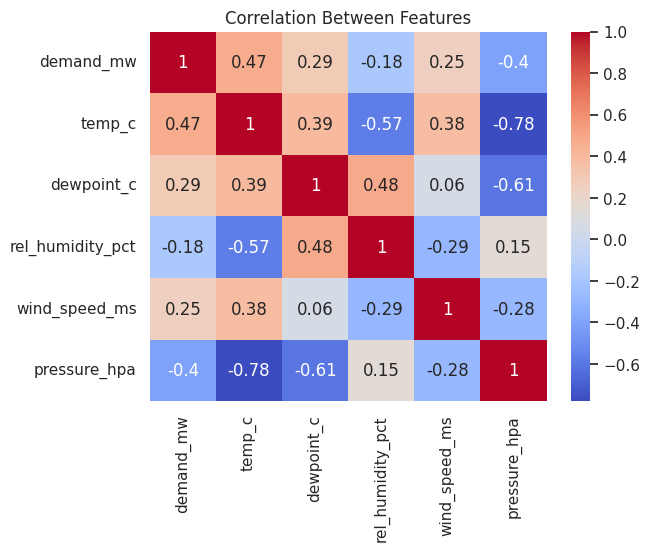

In [105]:
corr = electricity[['demand_mw','temp_c','dewpoint_c','rel_humidity_pct','wind_speed_ms','pressure_hpa']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


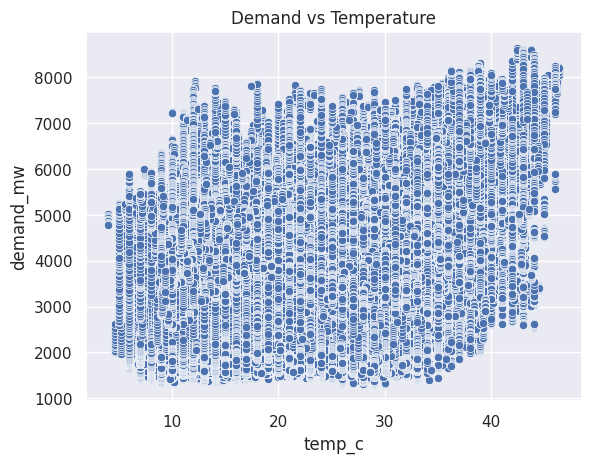

In [106]:
sns.scatterplot(x='temp_c', y='demand_mw', data=electricity)
plt.title('Demand vs Temperature')
plt.show()


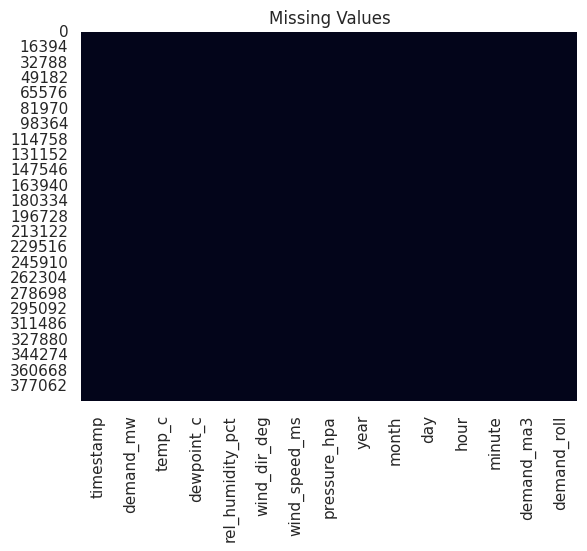

In [107]:
sns.heatmap(electricity.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()


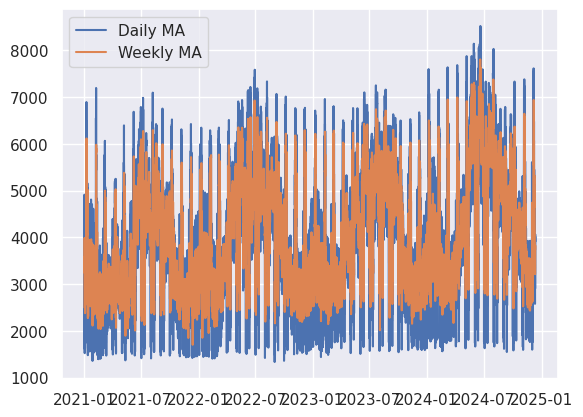

In [108]:
electricity['demand_ma24'] = electricity['demand_mw'].rolling(window=24).mean()  # daily average
electricity['demand_ma168'] = electricity['demand_mw'].rolling(window=168).mean()  # weekly average

plt.plot(electricity['timestamp'], electricity['demand_ma24'], label='Daily MA')
plt.plot(electricity['timestamp'], electricity['demand_ma168'], label='Weekly MA')
plt.legend()
plt.show()
